# **Gradient decsent Algorithm**

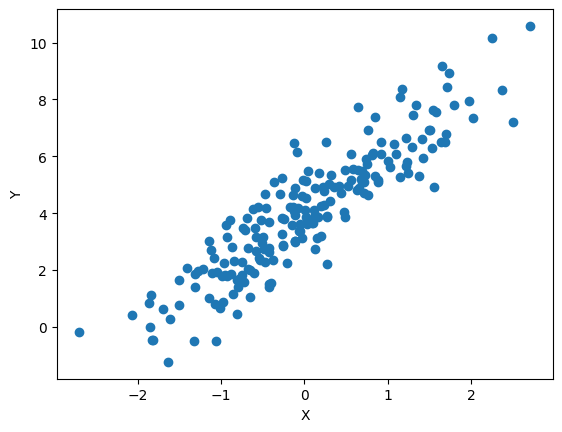

initial weight : [-0.69799917  0.66502405 -0.72232264 -0.72674051  0.48516783  0.21821095
  0.38348657 -0.78082749  0.2336239   1.87985482 -1.28781244 -0.76493799
 -0.10890272  0.20921735  1.22455006  0.54385981 -0.79704643  0.02805877
 -0.1831024  -0.50598652 -0.90999754 -0.17241871  0.34131845 -1.43258221
 -0.44792878  0.45245589  0.69985017 -1.65124205  1.18028848 -0.69265185
  0.490809   -0.44225988 -0.51641775 -0.69229692 -0.0925589  -0.09972794
  2.01996767  0.93090226  1.31282931  0.91242833 -0.60716562 -0.16405216
  0.01951229  1.38993428 -1.19482462  0.96028878  0.65700934  1.00465736
 -1.92649734 -0.86404885 -1.04047043 -1.07907785  0.45919653 -0.1141641
 -1.12975465  0.41597296  0.00604388  0.22705306 -1.17029318 -1.51494719
 -0.56943521 -0.69465557 -2.37375328 -0.82028317 -0.5853271   1.02351
  1.22142574  0.51980136 -0.17635451  0.81078531 -0.78093441 -0.52211242
  1.05306628  0.32507266 -1.16536258 -0.83022166 -1.73924285  0.05120373
  1.67472567 -0.41308355  1.46519432 -

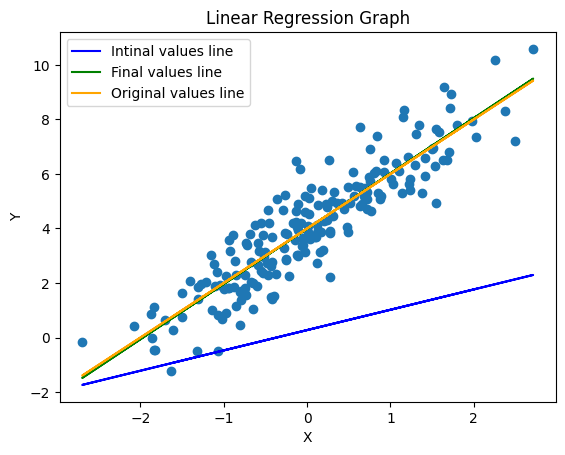

In [5]:
from numpy.random import normal

import matplotlib.pyplot as plt

import random

a = 4 # height

b = 2 # slope



# generate data

N = 200 # sample size

X = normal(loc=0.0, scale=1.0, size=N)

W = normal(loc=0.0, scale=1.0, size=N)

Y = a + b*X + W



# plot data

plt.scatter(X,Y)

plt.xlabel('X')

plt.ylabel('Y')

plt.show()

print("initial weight :",W)

#A function that calculates the mean squared error for

# given values of X and Y with parameters w1 and w2



def mean_square_error(X, Y, w1, w2):

    n = len(X)

    total_error = 0



    #running the loop for total numer of samples in dataset

    for i in range(n):

        #calculating the error value as given in the

        # above formula in statement (a)

        total_error = total_error + (w1 + w2 * X[i] - Y[i]) ** 2



    #Since this is a mean error, dividing the total error

    # calculated by total number of samples

    mse = total_error / n

    return mse

    #A function that calculates the Gradient/partial derivative of MSE

#We use partial derivatives to find how each individual parameter (w1 and w2)

# affects MSE and to update the values of w1 and w2

def gradient_mean_square_error(X, Y, w1, w2):

    n = len(X)

    partial_derivative_w1 = 0

    partial_derivative_w2 = 0



    #calculate the mse partial derivatives of w1 and w2

    # for number of samples in the dataset as we calculated them above

    for i in range(n):

        partial_derivative_w1 += 2 * (w1 + w2 * X[i] - Y[i])

        partial_derivative_w2 += 2 * (w1 + w2 * X[i] - Y[i]) * X[i]



    #take the mean of w1 and w2 vals

    partial_derivative_w1 = partial_derivative_w1 / n

    partial_derivative_w2 = partial_derivative_w2 / n



    return partial_derivative_w1 , partial_derivative_w2

    #This function implements the gradient descent algorithm

def gradient_descent(X, Y, w1, w2, learning_rate, num_iterations):



    mse_list = []



    for i in range(num_iterations):

        #We use our gradient_mean_square_error to

        # calculate partial derivatives of w1 and w2 and update them

        partial_derivative_w1, partial_derivative_w2 = gradient_mean_square_error(X, Y, w1, w2)

        w1 -= learning_rate * partial_derivative_w1

        w2 -= learning_rate * partial_derivative_w2



        mse_list.append(mean_square_error(X, Y, w1, w2))

    #return the final calculated derivatives

    return w1, w2 ,mse_list

    #Generate random value for w1 and w2 between 0 and 1

initial_w1 = random.uniform(0, 1)

initial_w2 = random.uniform(0, 1)



#define the learning rate and no of iterations we need to calculate

learning_rate = 0.1

iterations = 1000



# Perform gradient descent using our implemented gradient descent function

final_w1, final_w2,mse_final_list = gradient_descent(X, Y, initial_w1, initial_w2, learning_rate, iterations)



#Print the original and new calculated values of a and b

print("Original value a = ", a , " New calculated value w1 = ",final_w1)

print("Original value b = ", b , " New calculated value w1 = ",final_w2)

def predict(Y,X,w1,w2):

    Y_pred = []

    for x in X:

        val = w2*x + w1

        Y_pred.append(val)

    return Y_pred

    plt.figure(figsize=(10, 10))



# plot data as given above

plt.scatter(X,Y)

plt.xlabel('X')

plt.ylabel('Y')



get_preds = predict(Y,X,initial_w1,initial_w2)

# plot line graph using intital values of w1 and w2

plt.plot(X, get_preds, color='b' ,label = "Intinal values line")



get_preds = predict(Y,X,final_w1,final_w2)

# plot line graph using final values of w1 and w2

plt.plot(X, get_preds, color='g', label = "Final values line")



get_preds = predict(Y,X,a,b)

# plot line graph using final values of a and b

plt.plot(X, get_preds, color='orange', label = "Original values line")



#Plot the grpah

plt.title("Linear Regression Graph")

plt.legend()

plt.show()